# Mid-Term Part B

Student Name: <strong>Parthasarathy Rajendiran</strong> <br>
Student ID: <strong>8883828</strong>
<hr>

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

### Loading data and EDA

In [2]:
df = pd.read_csv('../../practical_labs/datasets/MidYerm/housing_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20629 non-null  float64
 3   total_rooms         20625 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20621 non-null  float64
 6   households          20626 non-null  float64
 7   median_income       20632 non-null  float64
 8   median_house_value  20560 non-null  float64
 9   ocean_proximity     20486 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN


In [4]:
df.describe(include='all').fillna('').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,,,,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,,,,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20629.0,,,,28.63338,12.584167,1.0,18.0,29.0,37.0,52.0
total_rooms,20625.0,,,,2636.314812,2182.184573,2.0,1448.0,2127.0,3148.0,39320.0
total_bedrooms,20433.0,,,,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20621.0,,,,1425.78551,1132.799376,3.0,787.0,1166.0,1725.0,35682.0
households,20626.0,,,,499.675555,382.405161,1.0,280.0,410.0,605.0,6082.0
median_income,20632.0,,,,3.871003,1.899969,0.4999,2.5634,3.53525,4.7437,15.0001
median_house_value,20560.0,,,,207334.239348,115352.171422,14999.0,120600.0,180400.0,265225.0,500001.0
ocean_proximity,20486,7,<1H OCEAN,9058,,,,,,,


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

In [6]:
df['ocean_proximity'].value_counts(dropna=False)

ocean_proximity
<1H OCEAN     9058
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NaN            154
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64

---

### Question 1: Outlier detection

In [7]:
df['median_house_value'].describe()

count     20560.000000
mean     207334.239348
std      115352.171422
min       14999.000000
25%      120600.000000
50%      180400.000000
75%      265225.000000
max      500001.000000
Name: median_house_value, dtype: float64

#### Whiskers method

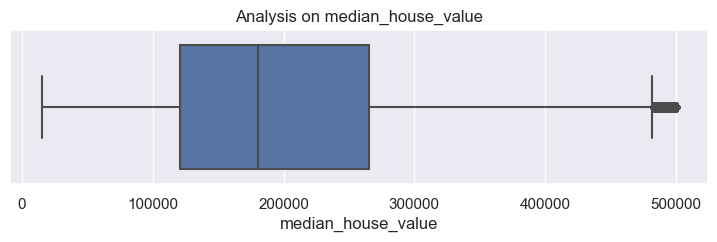

In [8]:
fig, ax = plt.subplots(figsize=(9, 2))
sns.boxplot(df, x='median_house_value')
plt.title('Analysis on median_house_value')
plt.show()

In [9]:
# Finding IQR
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print(f'{IQR = }\n{lower_fence = }\n{upper_fence = }\n')

# Flagging outliers which are apart 1.5 * IQR
mhv_whiskers_outliers = (df['median_house_value'] < lower_fence) | (df['median_house_value'] > upper_fence)

print(mhv_whiskers_outliers.value_counts())
print(f'\nThere are {len(df[mhv_whiskers_outliers])} outliers found in the median_house_value using whiskers method')


IQR = 144625.0
lower_fence = -96337.5
upper_fence = 482162.5

median_house_value
False    19568
True      1072
Name: count, dtype: int64

There are 1072 outliers found in the median_house_value using whiskers method


The records with outlier median_house_value based on whiskers method

In [10]:
df[mhv_whiskers_outliers]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19568,-118.37,33.81,33.0,5057.0,790.0,2021.0,748.0,6.8553,482200.0,NEAR OCEAN
19569,-117.19,32.69,35.0,2921.0,438.0,1042.0,415.0,6.3612,482700.0,NEAR OCEAN
19570,-117.87,33.60,34.0,3415.0,779.0,1275.0,718.0,4.4980,482900.0,<1H OCEAN
19571,-118.59,34.14,19.0,1303.0,155.0,450.0,145.0,10.5511,483100.0,<1H OCEAN
19572,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


#### z-score normalization

In [11]:
# Calculating z-score for price column
mhv_z_score = (df['median_house_value'] - df['median_house_value'].mean()) / df['median_house_value'].std()
mhv_z_score

0       -1.667374
1       -1.667374
2       -1.667374
3       -1.667374
4       -1.645693
           ...   
20635    2.537159
20636    2.537159
20637    2.537159
20638    2.537159
20639    2.537159
Name: median_house_value, Length: 20640, dtype: float64

Creating a new dataframe for outlier analysis

In [12]:
mhv_df = df[['median_house_value']].copy()
mhv_df['z_score'] = mhv_z_score
mhv_df['is_outlier'] = mhv_whiskers_outliers
mhv_df

,median_house_value,z_score,is_outlier
0,14999.0,-1.667374,False
1,14999.0,-1.667374,False
2,14999.0,-1.667374,False
3,14999.0,-1.667374,False
4,17500.0,-1.645693,False
...,...,...,...
20635,500001.0,2.537159,True
20636,500001.0,2.537159,True
20637,500001.0,2.537159,True
20638,500001.0,2.537159,True


Finding the minimum z score of the outlier (identified using whiskers method)

In [13]:
min_zscore = mhv_df[mhv_whiskers_outliers]['z_score'].min()
min_zscore

2.382839934976691

Validating the minimun z score can be used as the threshold

In [14]:
print('The records less than min_zscore should be inliers based on whiskers method')
display(mhv_df[mhv_df['z_score'] < min_zscore]['is_outlier'].value_counts())
print('The records greater than min_zscore should be outliers based on whiskers method')
display(mhv_df[mhv_df['z_score'] > min_zscore]['is_outlier'].value_counts())

The records less than min_zscore should be inliers based on whiskers method


is_outlier
False    19488
Name: count, dtype: int64

The records greater than min_zscore should be outliers based on whiskers method


is_outlier
True    1071
Name: count, dtype: int64

As the values below the min_zscore are the the inliers and above that value are outliers, we can use the min_zscore as the threshold to get the same outliers as whiskers method

In [15]:
print(f'To match the outliers from whiskers approach, the threshold for z-score would be \n±{min_zscore}')

To match the outliers from whiskers approach, the threshold for z-score would be 
±2.382839934976691


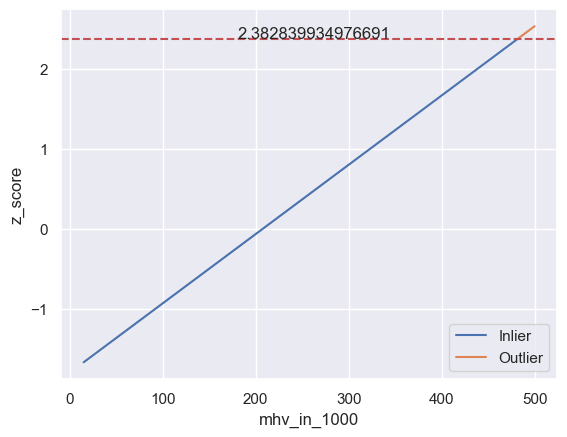

In [16]:
# Visualizing the threshold
mhv_df['mhv_in_1000'] = df['median_house_value'] / 1000
mhv_df['is_outlier'] = mhv_whiskers_outliers.map({True: 'Outlier', False: 'Inlier'})
ax = sns.lineplot(mhv_df, y='z_score', x='mhv_in_1000', hue='is_outlier')
ax.axhline(y=min_zscore, color='r', linestyle='--')
ax.text(mhv_df['mhv_in_1000'].median(), min_zscore, min_zscore)
plt.legend(loc='lower right')
plt.show()

#### Outlier removal in median_house_value

In [17]:
df = df[~mhv_whiskers_outliers]
print(f'Dataframe shape after removing outliers: {df.shape}')

Dataframe shape after removing outliers: (19568, 10)


---

### Question 2: Handling Missing value

In [18]:
numerical_features = df.select_dtypes(include='float64').columns
categorical_features = df.select_dtypes(exclude='float64').columns

In [19]:
# Creating backup of raw dataframe before doing any changes
df_raw = df.copy()

#### a. For Numerical Features

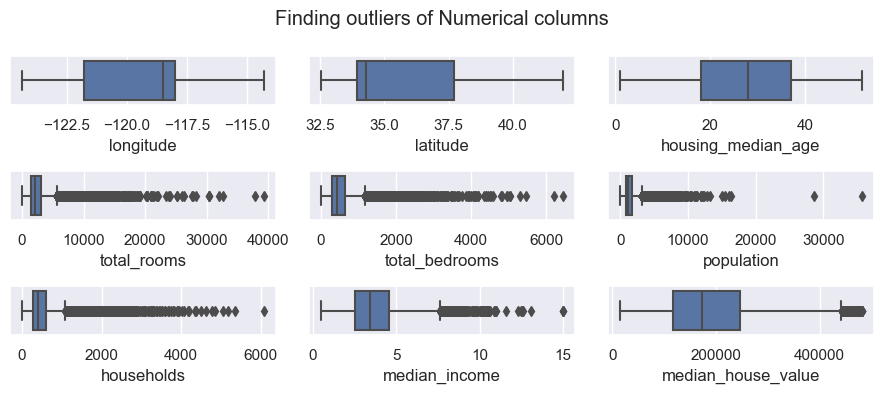

In [20]:
# Boxplotting numberical features to inspect outliers
fig, axes = plt.subplots(3, 3, figsize=(9, 4))
for idx, col_name in enumerate(numerical_features):
    i, j = divmod(idx, 3)
    sns.boxplot(df, x=col_name, ax=axes[i, j])
plt.suptitle('Finding outliers of Numerical columns')
fig.tight_layout()
plt.show()

By observing the boxplots, except longitude, latitude and housing_median_age all the other columns have outliers. <br>
The Mean will be impacted in case of outliers. <br>
So, we can use <b><u>Mean</u></b> for the numerical features <u>without outliers</u>, <br>
and <b><u>Median</u></b> for the features <u>with outliers</u>.

In [21]:
num_cols_without_outliers = ['longitude', 'latitude', 'housing_median_age']
print('{:<20}Imputation method'.format('Numerical Column'))
for col_name in numerical_features:
    print(f'{col_name:<20}{"Mean" if col_name in num_cols_without_outliers else "Median"}')

Numerical Column    Imputation method
longitude           Mean
latitude            Mean
housing_median_age  Mean
total_rooms         Median
total_bedrooms      Median
population          Median
households          Median
median_income       Median
median_house_value  Median


As we have a categorical variable, it would be better to take stratified mean/median to impute the numerical columns. <br>
However to do this, the categorical column needs to be fixed first. So the imputation of the numerical columns will be implemented after answering 2.b and 3

#### b. For categorical features 

In [22]:
cat_feature = categorical_features[0] # As we have only one categorical, we can have it in a variable instead of a list.
print(f'The categorical variable [{cat_feature}] has {df[cat_feature].isna().sum()} missing values')

The categorical variable [ocean_proximity] has 147 missing values


In [23]:
df[cat_feature].value_counts(dropna=False)

ocean_proximity
<1H OCEAN     8474
INLAND        6458
NEAR OCEAN    2407
NEAR BAY      2030
NaN            147
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64

The simple and popular way of imputing the categorical column is using the mode

In [24]:
mode_val = df[cat_feature].mode()[0]
print(f'Imputing the column [{cat_feature}] with the most frequent value [{mode_val}]')
df[cat_feature].fillna(mode_val, inplace=True)
df[cat_feature].value_counts(dropna=False)

Imputing the column [ocean_proximity] with the most frequent value [<1H OCEAN]


ocean_proximity
<1H OCEAN     8621
INLAND        6458
NEAR OCEAN    2407
NEAR BAY      2030
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64

### Question 3: Handling errors/inconsistencies in the fields

#### Inconsistency in Categorical Feature

By checking the distinct values, we can observe there are inconsistencies in ocean_proximity column<br>
Below combinations can be combined
* "INLAND" and "inland"
* "NEAR BAY" and "NEAR_bay"

In [25]:
replacements = {
    'inland': 'INLAND',
    'NEAR_bay': 'NEAR BAY'
}
df[cat_feature] = df[cat_feature].apply(lambda x: replacements.get(x, x))
df[cat_feature].value_counts()

ocean_proximity
<1H OCEAN     8621
INLAND        6473
NEAR OCEAN    2407
NEAR BAY      2062
ISLAND           5
Name: count, dtype: int64

#### Errors in Numerical Features

In [26]:
df[numerical_features].isna().sum()

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        200
population             19
households             14
median_income           8
median_house_value     80
dtype: int64

We can impute these missing values based on the method identified in section 2.a <br>
As we have a categorical column, considering stratified mean and median (based on ocean_proximity) would be more appropriate

In [27]:
grouped = df.groupby(cat_feature)

for col_name in numerical_features:
    if df[col_name].isna().sum() == 0:
        continue
    mean_values = grouped[col_name].mean()
    median_values = grouped[col_name].median()
    if col_name in num_cols_without_outliers:
        df[col_name] = np.where(
            df[col_name].isna(), mean_values[df[cat_feature]], df[col_name]
        )
    else:
        df[col_name] = np.where(
            df[col_name].isna(), mean_values[df[cat_feature]], df[col_name]
        )
df[numerical_features].isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### Question 4: Normalize numerical features using appropriate method based on feature characteristics.

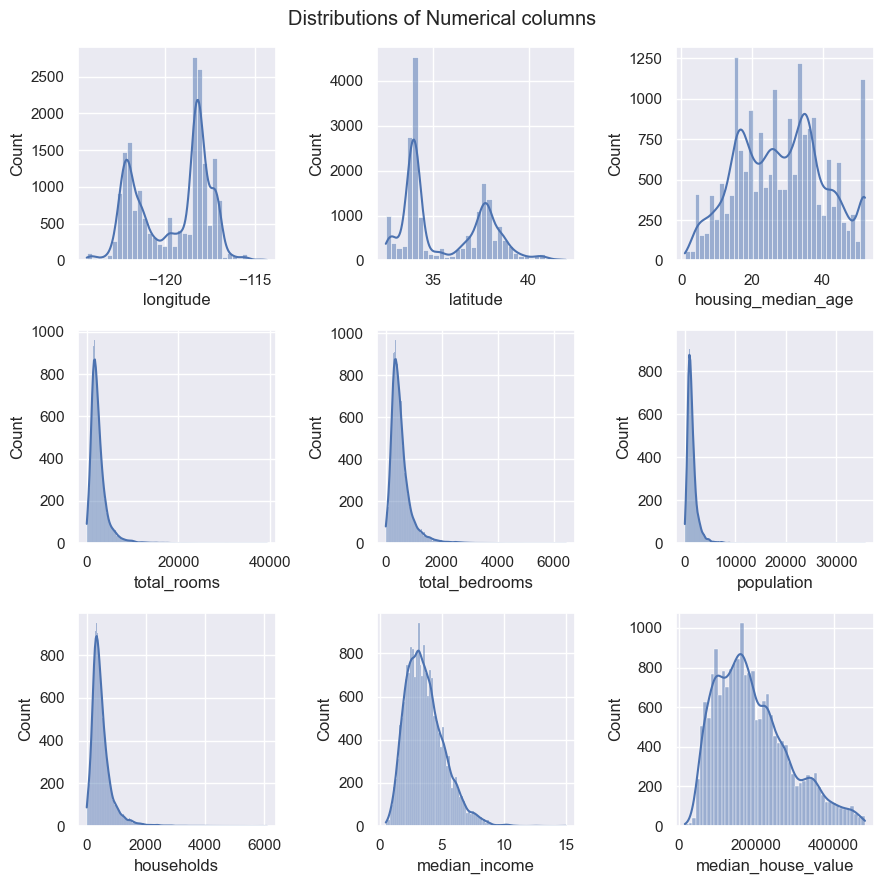

In [28]:
# Distributions of numerical features
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for idx, col_name in enumerate(numerical_features):
    i, j = divmod(idx, 3)
    sns.histplot(df, x=col_name, kde=True, ax=axes[i, j])
plt.suptitle('Distributions of Numerical columns')
fig.tight_layout()
plt.show()

Since most of the features have outliers, we can use Robust scaler which is least affected by the outliers.

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [31]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.122016,1.431579,-0.631579,-1.102732,-1.060694,-1.153523,-1.151235,-0.870018,-1.227983,INLAND
1,0.395225,0.560526,-0.473684,-0.886580,-0.580925,-0.727655,-0.762346,-0.655535,-1.227983,INLAND
2,0.172414,-0.007895,1.263158,-0.777316,-0.500000,-0.582545,-0.574074,0.366448,-1.227983,INLAND
3,-1.236074,1.589474,0.421053,-1.195962,-1.190751,-1.223975,-1.243827,-1.419141,-1.227983,INLAND
4,0.047745,-0.031579,0.578947,-0.961401,-0.786127,-0.970557,-0.842593,-0.525321,-1.208655,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19563,0.220159,-0.200000,-0.473684,0.485748,-0.034682,0.314406,0.058642,1.406301,2.371716,<1H OCEAN
19564,-1.010610,0.855263,-0.578947,2.691805,1.716763,1.445846,1.916667,1.438622,2.371716,NEAR OCEAN
19565,0.095491,-0.113158,0.052632,0.199525,-0.248555,-0.302839,-0.191358,2.055464,2.375580,<1H OCEAN
19566,0.029178,-0.100000,0.421053,0.131829,-0.028902,-0.156677,-0.012346,1.557216,2.377125,<1H OCEAN


### Question 5: Encode categorical variables using using appropriate method based on feature characteristics.

The ocean proximity seems to be ordinal. The property that is closer to ocean may be costlier because of its sea view and access to the beach facilities.

In [32]:
chk = df_raw.copy()
chk['ocean_proximity'] = chk['ocean_proximity'].apply(lambda x: replacements.get(x, x))
chk.groupby('ocean_proximity')['median_house_value'].mean().sort_values()

ocean_proximity
INLAND        122860.868946
<1H OCEAN     223454.575589
NEAR OCEAN    225917.140468
NEAR BAY      236342.920354
ISLAND        380440.000000
Name: median_house_value, dtype: float64

The mean house prices per each ocean proximity confirms our assumption about ordinality. So we can use label encoding here

In [33]:
ocean_proximity_encoder = {
    'INLAND': 1,
    '<1H OCEAN': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5  
}

df['encoded_ocean_proximity'] = df['ocean_proximity'].map(ocean_proximity_encoder)
df['encoded_ocean_proximity'].value_counts()

encoded_ocean_proximity
2    8621
1    6473
3    2407
4    2062
5       5
Name: count, dtype: int64

### Question 6: Feature Engineering

By analyzing the existing columns, we can calculate the number of rooms per household as a new feature

In [34]:
rooms_per_household = df_raw['total_rooms'].fillna(df_raw['total_rooms'].median()) / df_raw['households'].fillna(df_raw['households'].median())
rooms_per_household.describe()

count    19568.000000
mean         5.357299
std          2.295841
min          0.581509
25%          4.412974
50%          5.181818
75%          5.965368
max        132.533333
dtype: float64

In [35]:
# Normalizing the new feature
df['rooms_per_household'] = scaler.fit_transform(rooms_per_household.to_numpy().reshape(-1, 1))

## Descriptive Analytics

#### Distribution of housing prices across different ocean proximities

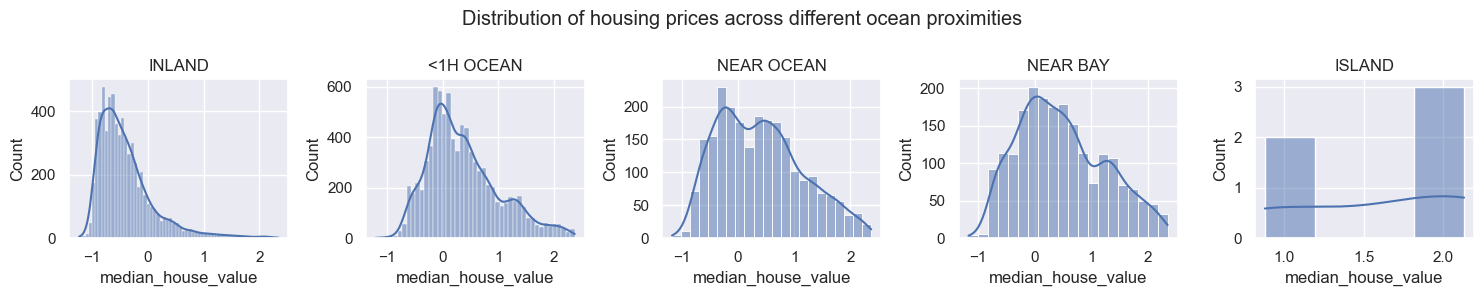

In [36]:
# Distributions of numerical features
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for prox, idx in ocean_proximity_encoder.items():
    i, j = divmod(idx - 1, 3)
    sns.histplot(df[df['encoded_ocean_proximity'] == idx], x='median_house_value', kde=True, ax=axes[idx -1])
    axes[idx -1].set_title(prox)
plt.suptitle('Distribution of housing prices across different ocean proximities')
fig.tight_layout()
plt.show()

#### Relationship between median income and housing prices

In [37]:
correlation = df['median_income'].corr(df['median_house_value'])
correlation

0.640390117608737

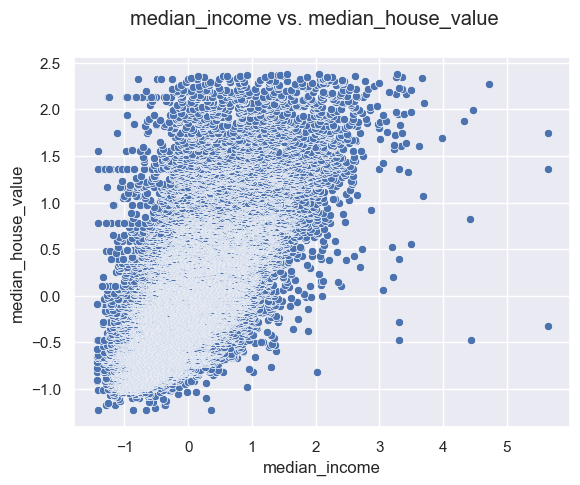

In [38]:
sns.scatterplot(df, x='median_income', y='median_house_value')
plt.suptitle('median_income vs. median_house_value')
plt.show()

The median income has a <b>positive correlation</b> with housing prices with the correlation coefficient <b>0.68</b>

## ML Model Training and Testing

#### 1. Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'encoded_ocean_proximity', 'rooms_per_household'
]
target = 'median_house_value'

In [41]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8883828)

print(f'The dataset of size {X.shape} has been splitted into')
print(f'Training   : {X_train.shape}')
print(f'Testing    : {X_test.shape}')

The dataset of size (19568, 10) has been splitted into
Training   : (15654, 10)
Testing    : (3914, 10)


#### 2. Train a linear regression baseline model

In [42]:
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

### 3. learned coefficients (weights)

In [43]:
df_wt = pd.DataFrame(base_model.coef_, index=base_model.feature_names_in_, columns=['weight'])
print('The learned coefficients of the base model is ')
display(df_wt)

The learned coefficients of the base model is 


,weight
longitude,-0.961603
latitude,-0.980829
housing_median_age,0.124305
total_rooms,-0.099839
total_bedrooms,0.143148
population,-0.226015
households,0.218266
median_income,0.585100
encoded_ocean_proximity,0.072445
rooms_per_household,0.018515


In [44]:
max_weight = df_wt['weight'].max()
feature_with_hr_wt = df_wt[df_wt['weight'] == max_weight].index[0]
print(f'The feature [{feature_with_hr_wt}] has the higher weight [{max_weight}]')

The feature [median_income] has the higher weight [0.5851004302415468]


#### 4. Model Evaluation

In [45]:
from sklearn import metrics

In [46]:
def model_performance(y_test, y_pred):
    performance_dict = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean Absolute Percentage Error': metrics.mean_absolute_percentage_error(y_test, y_pred),
        f'R\u00b2': metrics.r2_score(y_test, y_pred)
    }
    return performance_dict


In [47]:
y_pred = base_model.predict(X_test)

display(model_performance(y_test, y_pred))

{'Mean Absolute Error': 0.3411596290331269,
 'Mean Squared Error': 0.20486855923418565,
 'Root Mean Squared Error': 0.45262408158888945,
 'Mean Absolute Percentage Error': 727722203634.5568,
 'R²': 0.6108895455604696}

#### Other models

In [48]:
from sklearn.linear_model import Lasso

model_1 = Lasso(alpha=1.0)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

In [49]:
from sklearn.linear_model import Ridge

model_2 = Ridge(alpha=1.0)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

In [50]:
from sklearn.tree import DecisionTreeRegressor

model_3 = DecisionTreeRegressor(random_state=8883828)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

In [51]:
from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(random_state=8883828)
model_4.fit(X_train, y_train)

y_pred_4 = model_4.predict(X_test)

In [52]:
model_results = [
    model_performance(y_test, y_pred),
    model_performance(y_test, y_pred_1),
    model_performance(y_test, y_pred_2),
    model_performance(y_test, y_pred_3),
    model_performance(y_test, y_pred_4)
]
display(pd.DataFrame(model_results, index=['Baseline', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest']))

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,R²
Baseline,0.341160,0.204869,0.452624,7.277222e+11,0.610890
Lasso,0.590527,0.526759,0.725782,4.771853e+11,-0.000483
Ridge,0.341148,0.204870,0.452625,7.275046e+11,0.610887
Decision Tree,0.317804,0.220126,0.469176,1.092840e+12,0.581911
Random Forest,0.223598,0.106011,0.325593,5.000210e+11,0.798651


We have train other 4 models.  
* Lasso: Introduces L1 regularization. However, this has the least performance.
* Ridge: Introduces L2 regularization. This is similar to the baseline model. (LinearRegression uses MSE for optimization by default)
* Decision Tree: This is a non-linear model. The performance is better than the baseline model as it is considering the non-linear feature relationships also.
* Random Forest: This is an ensemble model of decision trees. This has the best performance.

---